In [ ]:
print("hello")

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import warnings
import xgboost as xgb
import lightgbm as lgb
from scipy.stats import skew
from scipy import stats
from scipy.stats.stats import pearsonr
from scipy.stats import norm
from collections import Counter
from sklearn.linear_model import LinearRegression,LassoCV, Ridge, LassoLarsCV,ElasticNetCV
from sklearn.model_selection import GridSearchCV, cross_val_score, learning_curve
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, ExtraTreesRegressor, GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler, Normalizer, RobustScaler
warnings.filterwarnings('ignore')
sns.set(style='white', context='notebook', palette='deep')
%config InlineBackend.figure_format = 'retina' #set 'png' here when working on notebook
%matplotlib inline

In [128]:
df = pd.read_csv("/content/drive/MyDrive/20212/class/tich-hop-du-lieu/bai-tap-lon/real-estate-integration/prj-exam/data-matching/final_data_full_feature.csv")

In [129]:
df.select_dtypes(include=['object']).columns

Index(['title', 'description', 'square', 'name_contact', 'phone_contact',
       'date', 'direct', 'street', 'floor', 'juridical', 'bedroom', 'length',
       'width', 'link_image', 'url_page', 'kitchen', 'parking', 'terrace',
       'type', 'district', 'province', 'ward'],
      dtype='object')

In [41]:
df.select_dtypes(include=['int64','float64']).columns

Index(['price'], dtype='object')

In [ ]:
df['price']

In [131]:
df['price'].isna().sum()

1005

In [132]:
df = df[df['price'].notna()]

{'boxes': [<matplotlib.lines.Line2D at 0x7f83b5d19a10>],
 'caps': [<matplotlib.lines.Line2D at 0x7f83b6c26990>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f83b6c2e810>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f83b6c14b50>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f83b5d192d0>,
  <matplotlib.lines.Line2D at 0x7f83b7a74a50>]}

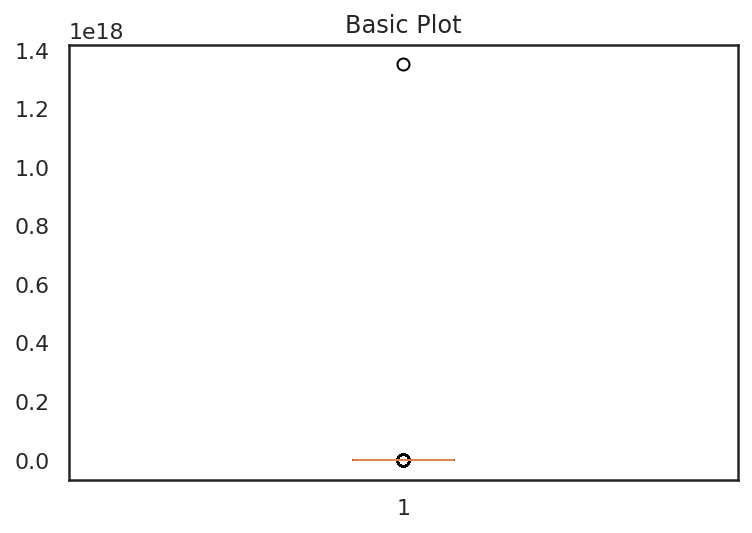

In [133]:
fig1, ax1 = plt.subplots()
ax1.set_title('Basic Plot')
ax1.boxplot(df['price'])


 mu = 2955327558.40 and sigma = 2440464522.21



Text(0.5, 1.0, 'SalePrice distribution')

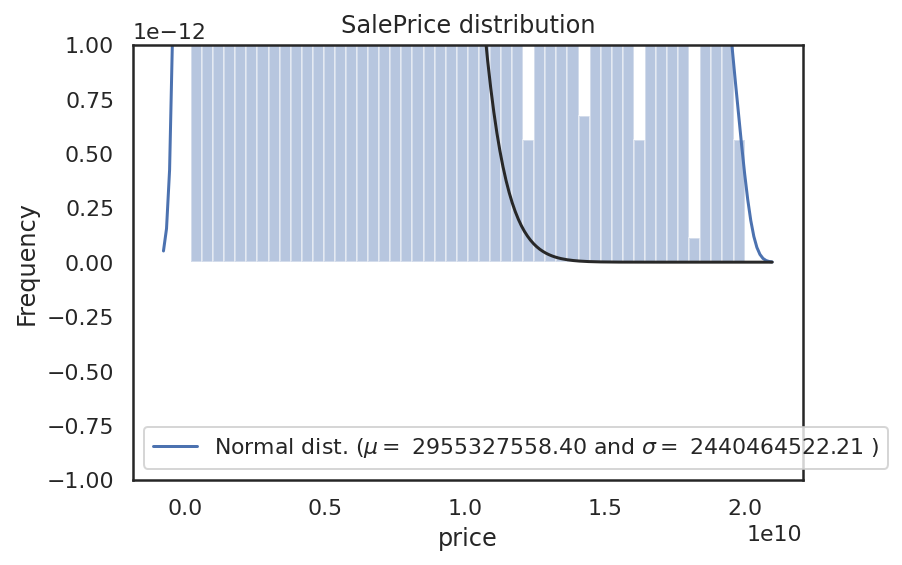

In [136]:
sns.distplot(df['price'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(df['price'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')


In [143]:
df.shape

(22213, 23)

In [138]:
df["square"]

0          0 m
1          0 m
2          0 m
3          0 m
4          0 m
         ...  
22487     40 m
22488     65 m
22489     65 m
22490     64 m
22491     43 m
Name: square, Length: 22492, dtype: object

In [140]:
def rm_m(x):
    if(x == 'KXĐ'):
      return 0
    return str(x).replace("m","").strip().replace(".","")
df["square"] = df["square"].apply(rm_m)
df['square'] = df['square'].astype(str).astype(float)


In [142]:
# df=(df[df.square != '8.600.000'])
df=(df[df.square > 0])
df.reset_index(drop=True, inplace=True)

In [154]:
df.shape

(21497, 23)


 mu = 72.72 and sigma = 27.10



Text(0.5, 1.0, 'SalePrice distribution')

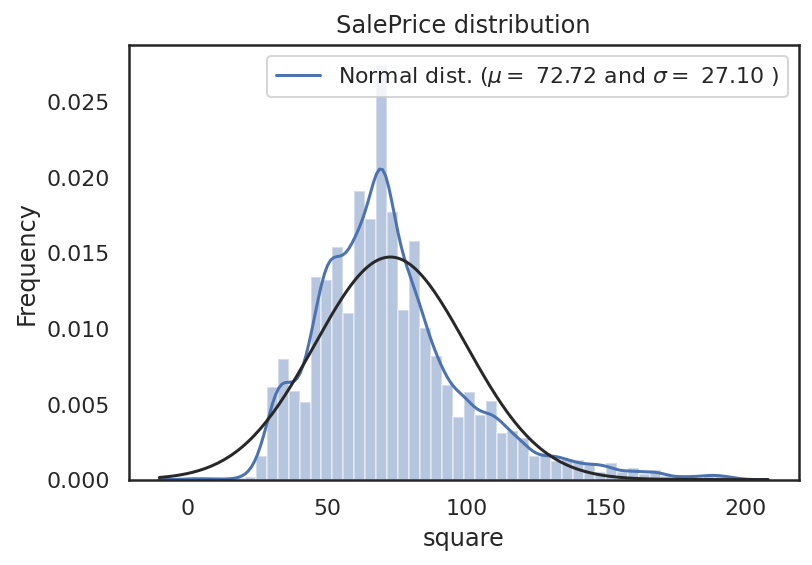

In [153]:
sns.distplot(df['square'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(df['square'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

In [152]:
df=(df[df.square < 200])
df.reset_index(drop=True, inplace=True)

In [155]:
df1 = df 

In [169]:
df.shape

(21497, 23)

In [157]:
df1['floor']

0        0 t
1        2 t
2        2 t
3        1 t
4        1 t
        ... 
21492    0 t
21493    0 t
21494    1 t
21495    0 t
21496    6 t
Name: floor, Length: 21497, dtype: object

In [162]:
def convert_floor(x):
    
    x =  str(x).replace("t","").strip()
    if(x == ''):
      x = 0
    return x
df1["floor"] = df1["floor"].apply(convert_floor)
df1['floor'] = df1['floor'].astype(str).astype(float)

In [166]:
df1 = df1[df1.floor != 0]

In [168]:
df1.shape

(17238, 23)

In [173]:
df1['bedroom']

1         3.0
2         3.0
3         1.0
4         3.0
6         2.0
         ... 
21489     3.0
21490     3.0
21491     3.0
21494     2.0
21496    12.0
Name: bedroom, Length: 17238, dtype: float64

In [172]:
def convert_bed(x):
    
    x =  str(x).replace("pn","").strip()
    if(x == ''):
      x = 0
    return x
df1["bedroom"] = df1["bedroom"].apply(convert_bed)
df1['bedroom'] = df1['bedroom'].astype(str).astype(float)

In [174]:
df1['parking']

1        Không
2        Không
3        Không
4        Không
6        Không
         ...  
21489      NaN
21490      NaN
21491      NaN
21494      NaN
21496       Có
Name: parking, Length: 17238, dtype: object

In [176]:
df_meaning = df1[['square', 'street', 'floor', 'bedroom', 'district', 'province', 'ward', 'price']]

In [177]:
df_meaning.select_dtypes(include=['int64','float64']).columns

Index(['square', 'floor', 'bedroom', 'price'], dtype='object')

In [178]:
df_meaning.select_dtypes(include=['object']).columns

Index(['street', 'district', 'province', 'ward'], dtype='object')

In [ ]:
train.head()

In [82]:
df.select_dtypes(include=['int64','float64']).columns

Index(['price', 'square'], dtype='object')

In [16]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df, test_size=0.2)

In [ ]:
train['SalePrice'].describe()

In [17]:
print("\nThe train data size : {} ".format(train.shape)) 
print("The test data size  : {} ".format(test.shape))


The train data size : (20410, 23) 
The test data size  : (5103, 23) 
